# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
**Source**
- Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

- Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

**Important**: We mentioned in our data ethics lesson earlier that data can include offensive or inappropriate language at times. This is already becoming very apparent in the Boston Data, which includes a racial variable. 
Note that the Boston Housing data was constructed in the 1970’s, and is based on US census Data. On census.gov, you can read the following note:
> "Census statistics date back to 1790 and reflect the growth and change of the United States. Past census reports contain some terms that today's readers may consider obsolete and inappropriate. As part of our goal to be open and transparent with the public, we are improving access to all Census Bureau original publications and statistics, which serve as a guide to the nation's history."

With that note, it is important to absolutely handle with care, and it is strongly adviced to _not_ use the racial variable when creating a predictive model.


We will start by importing the csv containing our housing data

In [194]:
import pandas as pd

df = pd.read_csv('train.csv')

# let's look at our data
# df.head()
# df.info()
df.describe()  
# plt.style.available


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


Now we will do some exploratory analyis of our data.

<IPython.core.display.Javascript object>


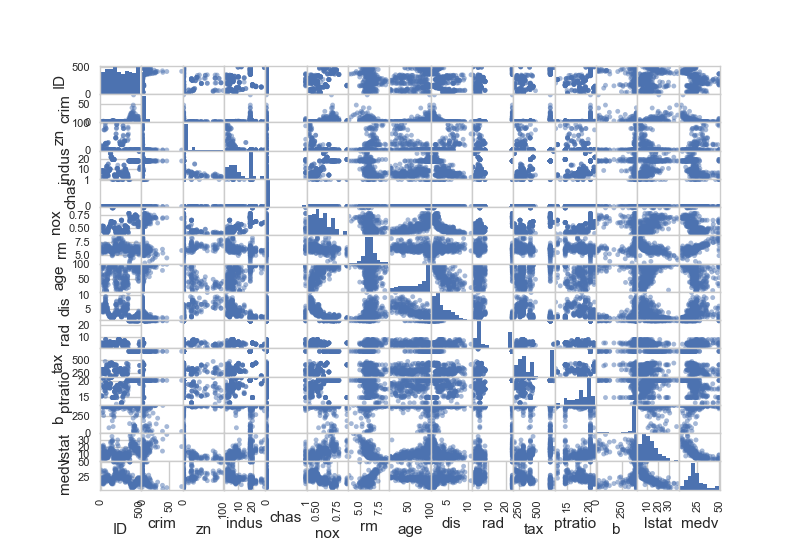

In [195]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')  


pd.plotting.scatter_matrix(df);


From the exploratory scatterplots, we chose to explore the following variables:
- `ptratio`: pupil-teacher ratio by town 
- `crim`: per capita crime rate by town  
- `medv`: median value of owner-occupied homes in $10000s

In [196]:
# remove unneccessary columns
small_df = df.drop(columns=["age", "rm", 'nox', 'tax', 'lstat', 'b', 'indus', 'zn', 'ID', 'chas', 'rad', 'dis'])
small_df.head()

,crim,ptratio,medv
0,0.00632,15.3,24.0
1,0.02731,17.8,21.6
2,0.03237,18.7,33.4
3,0.06905,18.7,36.2
4,0.08829,15.2,22.9


Now we will do some basic centrality and dispersion using built-in Python functions.

In [197]:
def mean(values):
    return sum(values)/len(values)

def median(values):
    values = sorted(values)
    if len(values)%2 == 0:
        med = (values[len(values) // 2] + values[len(values) // 2 - 1]) / 2
    else:
        med = values[len(values) // 2]
    
    return med

def mode(values):
    count_list = {}
    for val in values:
        if val in count_list:
            count_list[val] += 1
        else:
            count_list[val] = 1
            
    maxval = max(count_list.values())
    
    modes = []
    for val in count_list:
        if count_list[val] == maxval:
            modes.append(val)
    return modes

#print(mode([1, 2, 3, 3, 3, 2, 2, 1, 3, 2, 1, 1, 4, 2, 4, 4, 4, 4]))  # test function
#print(mean([2, 3, 4, 5]))
#print(median([1, 2, 3, 4]))



# Student teacher ratio centrality
mn = mean(small_df['ptratio'])
med = median(small_df['ptratio'])
mod = mode(small_df['ptratio'])
min_ = min(small_df['ptratio'])
max_ = max(small_df['ptratio'])

print("Student teacher ratio - mean:{:.2f}, median: {:.2f}, mode(s): {}, min: {}, max: {}".format(mn, med, mod, min_, max_))

# Crime
mn = mean(small_df['crim'])
med = median(small_df['crim'])
mod = mode(small_df['crim'])
min_ = min(small_df['crim'])
max_ = max(small_df['crim'])

print("Crime - mean: {:.2f}, median: {:.2f}, mode(s): {}, min: {}, max: {}".format(mn, med, mod, min_, max_))

# Home value (x$10k)
mn = mean(small_df['medv'])
med = median(small_df['medv'])
mod = mode(small_df['medv'])
min_ = min(small_df['medv'])
max_ = max(small_df['medv'])

print("Home Value - mean: {:.2f}, median: {:.2f}, mode(s): {}, min: {}, max: {}".format(mn, med, mod, min_, max_))



Student teacher ratio - mean:18.45, median: 19.00, mode(s): [20.2], min: 12.6, max: 21.2
Crime - mean: 3.36, median: 0.26, mode(s): [0.01501], min: 0.00632, max: 73.5341
Home Value - mean: 22.77, median: 21.60, mode(s): [50.0], min: 5.0, max: 50.0


We could quickly check our calculations with dataframes as below.

In [198]:
small_df.describe()

,crim,ptratio,medv
count,333.000000,333.000000,333.000000
mean,3.360341,18.448048,22.768769
std,7.352272,2.151821,9.173468
min,0.006320,12.600000,5.000000
25%,0.078960,17.400000,17.400000
50%,0.261690,19.000000,21.600000
75%,3.678220,20.200000,25.000000
max,73.534100,21.200000,50.000000


Now we will break the student-teacher ratio data into class sizes into three top 25%, bottom 25%, and IQR (middle 50%).

In [199]:
q1 = small_df['ptratio'].quantile(.25)
q3 = small_df['ptratio'].quantile(.75)

ptratio_q1 = small_df[small_df['ptratio'] < q1]
ptratio_q3 = small_df[small_df['ptratio'] > q3]
ptratio_iqr = small_df[small_df['ptratio'].between(q1, q3, inclusive=True)]

print(q3)
ptratio_q3
# print(len(ptratio_25) + len(iqr) + len(ptratio_75))  # adds up to original data





20.2


,crim,ptratio,medv
8,0.62976,21.0,20.4
9,0.63796,21.0,18.2
10,0.62739,21.0,19.9
11,1.05393,21.0,23.1
12,0.80271,21.0,20.2
13,1.25179,21.0,13.6
14,0.85204,21.0,19.6
15,1.23247,21.0,15.2
16,0.98843,21.0,14.5
17,0.95577,21.0,14.8


<IPython.core.display.Javascript object>


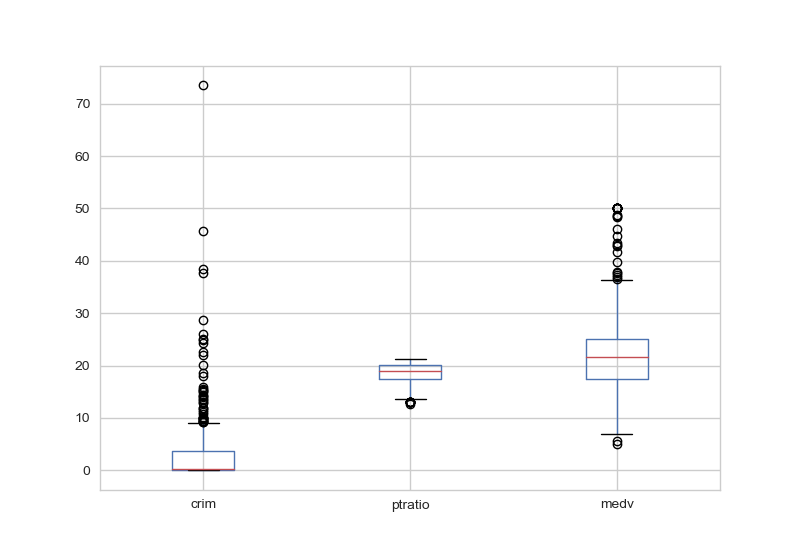

In [200]:
box1 = small_df.plot.box()



Crime:
Looking at the crime data provided, the data is heavily skewed left.  Most suburbs had crime that measured less than 0.3.  The mean and whisker on the top of the box plot shows a significant nubmer of outliers.  In a few specific communities, there were disproportionately large crime statistics.

Pupil teacher ratios:
This data skews a little left but the variance is fairly small across the data.  

Home values:
The data shows a large variance with most outliers in the high value range.  


The exploratory data shows that there may be a relationship between pupil to teacher ratios and home values.  We will show this on a data plot below.

<IPython.core.display.Javascript object>


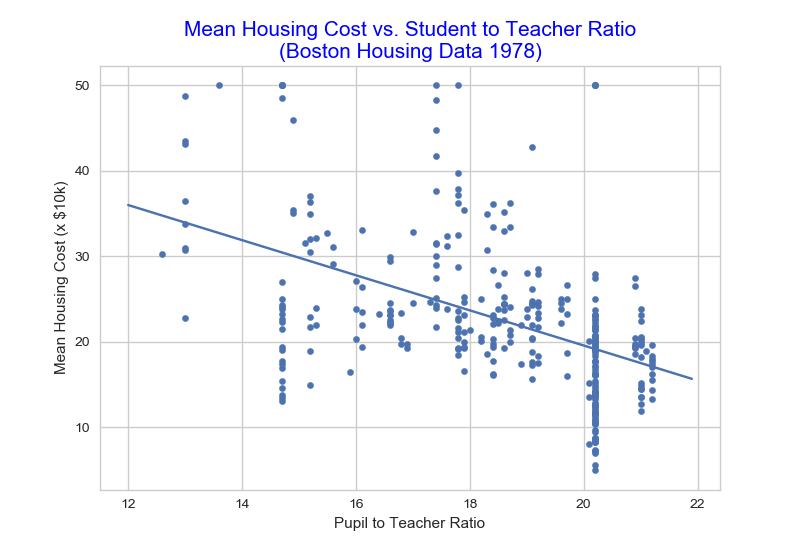

Equation of linear fit: y = -2.05 * x + 60.63


In [241]:
import numpy as np

scatter1 = small_df.plot.scatter('ptratio', 'medv')
scatter1.set_title("Mean Housing Cost vs. Student to Teacher Ratio\n(Boston Housing Data 1978)", color='blue', fontsize=15)
scatter1.set_xlabel("Pupil to Teacher Ratio")
scatter1.set_ylabel("Mean Housing Cost (x $10k)")


m, b = np.polyfit(small_df['ptratio'], small_df['medv'], 1)
x1 = np.arange(12, 22, 0.1)
plt.plot(x1, [m * x + b for x in x1])


print("Equation of linear fit:", "y = {:.2f} * x + {:.2f}".format(m, b))


<IPython.core.display.Javascript object>


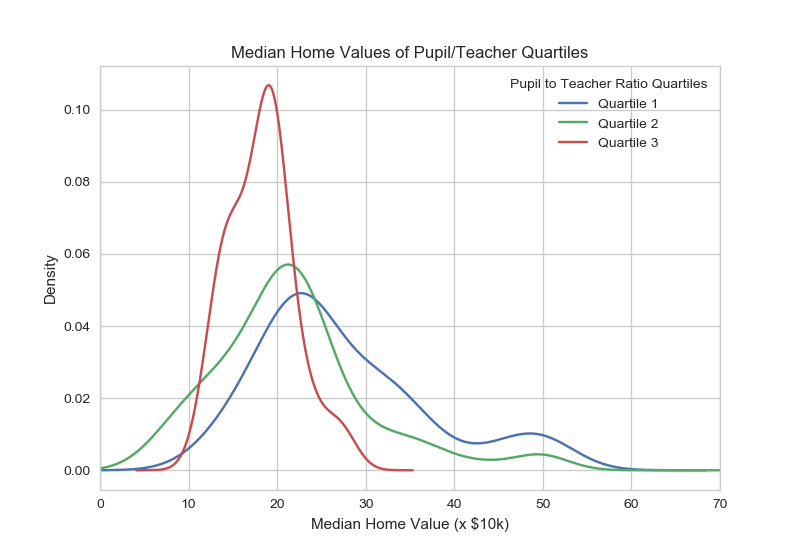

Text(0.5, 1.0, 'Median Home Values of Pupil/Teacher Quartiles')

In [231]:
import numpy as np

# lets plot histograms of the crime for Q1, Q2, and Q3 ptratios.
plt.figure()
b = np.arange(12, 24, 0.5)
#ptratio_q1['medv'].plot.hist(bins=b, alpha=0.3, label='Quartile 1', color='green')
#ptratio_iqr['medv'].plot.hist(bins=b, alpha=0.2, label='IQR', color='green')
#ptratio_q3['medv'].plot.hist(bins=b, alpha=0.3, label='Quartile 3', color='red')

# Histograms were difficult to read, so I switched to kde
q1 = ptratio_q1['medv'].plot.kde(label="Quartile 1")
q2 = ptratio_iqr['medv'].plot.kde(label="Quartile 2")
q3 = ptratio_q3['medv'].plot.kde(label="Quartile 3")

plt.xlim([0,70])
plt.xlabel("Median Home Value (x $10k)")
plt.legend(title="Pupil to Teacher Ratio Quartiles")
plt.title("Median Home Values of Pupil/Teacher Quartiles")




## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!